# Sound Processing Fundamentals

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython 
import librosa
from scipy import signal

---

### Working with simple waveforms
Equation for the simplest periodic wave, a **sinusoid**:

$x(t) = A * sin(2\pi ft + \theta)$

where $A$ is amplitude, $f$ is frequency, $t$ is time, and $\theta$ is phase.


In [ ]:
# function to generate a sine wave

def get_sinusoid(amplitude, frequency, duration, sr, phase=0):
    """
    Generate a sine wave signal.

    Parameters:
    ----------
    amplitude : float
        The peak amplitude of the sine wave.
    frequency : float
        The frequency of the sine wave in Hertz (Hz).
    duration : float
        The duration of the sine wave in seconds.
    sr : int
        The sampling rate, in samples per second (Hz).
    phase : float, optional
        The initial phase of the sine wave in radians. Default is 0.

    Returns:
    -------
    numpy.ndarray
        A 1D array containing the generated sine wave samples.
    """


    # time vector
    num_samples = int(sr * duration)
    time_vector = np.linspace(0, duration, num_samples, endpoint=False)

    # sine wave: y(t) = A * sin(2πft + phase)
    sine_wave_samples = amplitude * np.sin(2 * np.pi * frequency * time_vector + phase)

    return sine_wave_samples

In [ ]:
wav1 = get_sinusoid(amplitude=1, frequency=440, duration=0.5, sr=16000, phase=0)
wav2 = get_sinusoid(amplitude=0.5, frequency=1000, duration=0.5, sr=16000, phase=0)

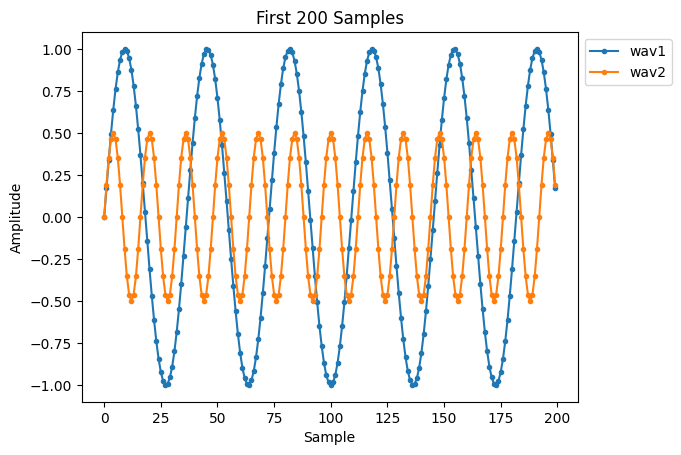

In [ ]:
plt.plot(wav1[:200], marker='.', label='wav1')
plt.plot(wav2[:200], marker='.', label='wav2')
plt.title("First 200 Samples")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
print('wav 1:')
IPython.display.display(IPython.display.Audio(wav1, rate=16000)) 

print('wav 2:')
IPython.display.display(IPython.display.Audio(wav2, rate=16000)) 

wav 1:


wav 2:


combined wave:


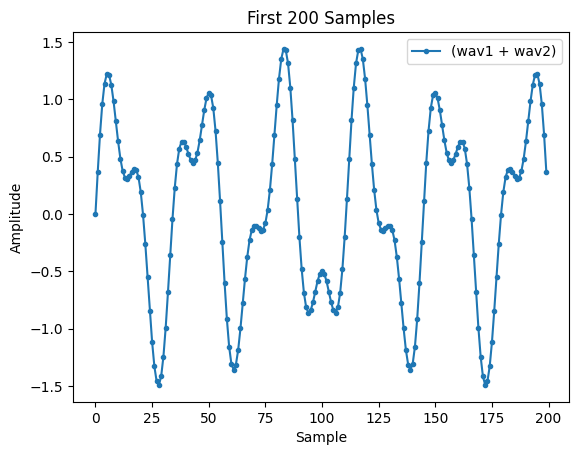

In [ ]:
# Add wav1 and and wav1 together
combined = wav1 + wav2

print("combined wave:")
IPython.display.display(IPython.display.Audio(combined, rate=16000))

# TODO : Plot the sum of wav1 an wav2. [0.05 pts]
plt.plot(combined[:200], marker='.', label='(wav1 + wav2)')
plt.title("First 200 Samples")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

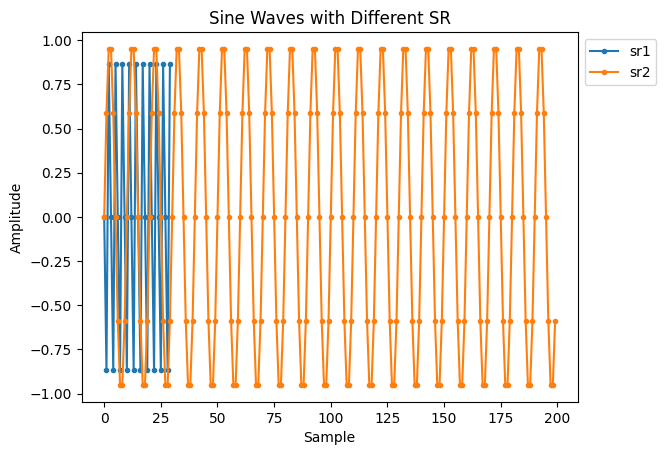

In [ ]:
sr1 = get_sinusoid(amplitude=1, frequency=200, duration=0.1, sr=300, phase=0)
sr2 = get_sinusoid(amplitude=1, frequency=200, duration=0.1, sr=2000, phase=0)


# The two sine waves on the same plot, with a legend showing their sample rates.
plt.plot(sr1, marker='.', label='sr1')
plt.plot(sr2, marker='.', label='sr2')
plt.title("Sine Waves with Different SR")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

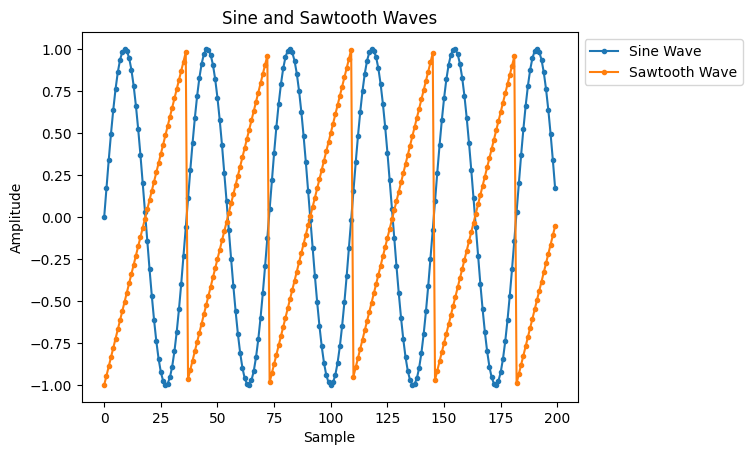

In [ ]:
# A sine wave and a sawtooth wave 
"""
params: amp = 1, freq=440, duration=1, sr=16000, phase=0
"""
from scipy.signal import sawtooth

amp = 1
freq = 440
duration = 1
sr = 16000
phase = 0

num_samples = int(sr * duration)
time_vector = np.linspace(0, duration, num_samples, endpoint=False)

sin = get_sinusoid(amplitude=amp, frequency=freq, duration=duration, sr=sr, phase=phase)
saw = amp * sawtooth(2 * np.pi * freq * time_vector + phase)

plt.plot(sin[:200], marker='.', label='Sine Wave')
plt.plot(saw[:200], marker='.', label='Sawtooth Wave')
plt.title("Sine and Sawtooth Waves")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



---


### Loading audio clips
Before we get more complicated with simple signals, let's also make sure you know how to load a real-world audio clip in Python.

**[Librosa](https://librosa.org/doc/latest/index.html)** is an awesome library for audio processing in Python, created by Brian McFee (NYU Professor!). We will use Librosa a lot in this class.

For now let's just load files with Librosa: https://librosa.org/doc/0.10.2/generated/librosa.load.html#librosa-load.


total num of samples =  117601
sampling rate =  22050
duration =  5.333378684807256


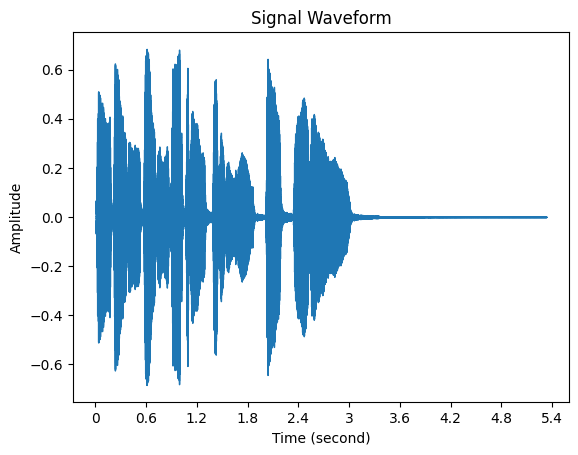

In [ ]:
filename = librosa.ex('trumpet')

# Load audio file at default sample rate
y, sr = librosa.load(filename, sr=None)

num_samples = len(y)
print('total num of samples = ', num_samples)

print('sampling rate = ', sr)

duration = num_samples / sr
print('duration = ', duration)

librosa.display.waveshow(y, sr=sr)
plt.title("Signal Waveform")
plt.xlabel("Time (second)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Play the signal at the original sample rate 
import IPython.display as ipd

filename = librosa.ex('trumpet')

y_org, sr_org = librosa.load(filename, sr=None)
print('Original Audio')
ipd.display(ipd.Audio(y_org, rate=sr_org))

y_4000, sr_4000 = librosa.load(filename, sr=4000)
print('Audio with sample rate 4kHz')
ipd.display(ipd.Audio(y_4000, rate=4000))

Original Audio


Audio with sample rate 4kHz




---


## Discrete Fourier Transform (DFT) & Fast Fourier Transform (FFT) 

In [ ]:
def get_fft_spectrum(x, sr):
    """
    Computes the Fast Fourier Transform (FFT) of a 1D signal and
    cleans it up for a spectrum plot.

    Parameters:
    -----------
        x : numpy.ndarray
            Input signal, a 1D array.
        sr : int
            Sampling rate of the input signal.
    Returns:
    -------
        trunc_freq_bins : numpy.ndarray
            A 1D array containing the frequency bins.
            Truncated at N/2.
        trunc_fft : numpy.ndarray
            A 1D array containing the FFT values.
            Tuncated at N/2.
    """
    
    # Let N = number of samples
    N = len(x)

    # the frequency resolution
    freq_resolution = sr / N
    
    # the frequency bins
    freq_bins = np.arange(0, N // 2) * freq_resolution

    # FFT of X
    fft_x = np.fft.fft(x)

    # Truncate the frequency bins to only include the first half
    fft_x_truncated = fft_x[:N // 2]

    # Get rid of the complex portion and truncate to only include the first half
    abs_fft_x_truncated = np.abs(fft_x_truncated)

    # Normalize the magnitude of the FFT by the number of samples it has
    abs_fft_x_truncated = abs_fft_x_truncated / N

    return freq_bins, abs_fft_x_truncated


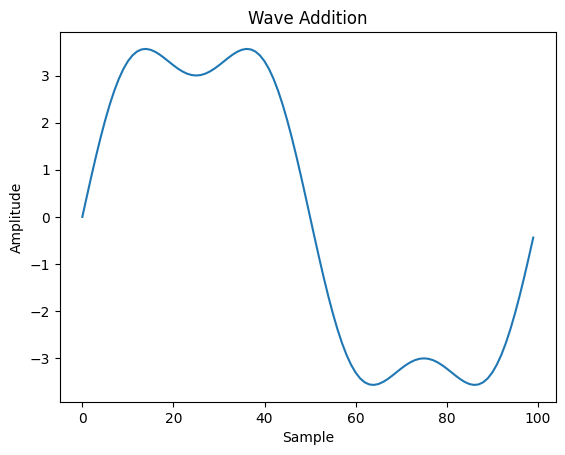

In [ ]:
"""
`x`: freq=1, amp=4, duration=1, sr=100
"""
x = get_sinusoid(amplitude=4, frequency=1, duration=1, sr=100)

x2 = get_sinusoid(amplitude=1, frequency=3, duration=1, sr=100)
x = x + x2

plt.plot(x)
plt.title("Wave Addition")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

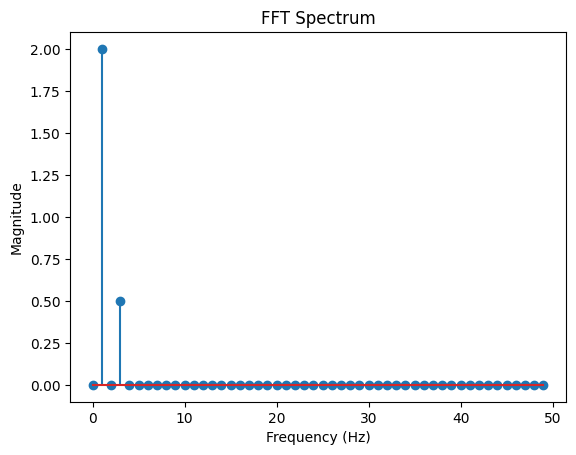

In [ ]:
freqs, fft_bins = get_fft_spectrum(x, sr=100)

plt.stem(freqs, fft_bins)
plt.title("FFT Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

#### Original Signal

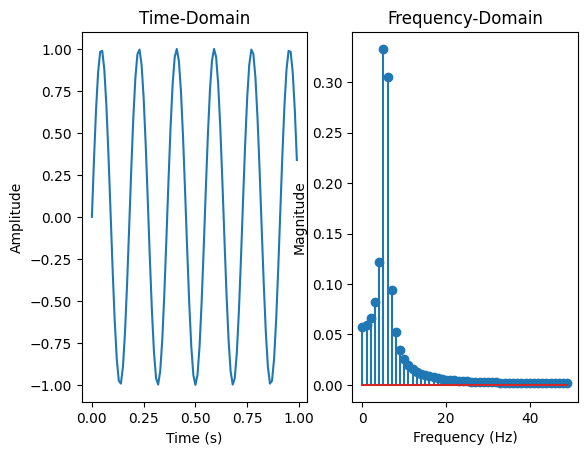

In [ ]:
"""
`y`: amp = 1, freq=5.5, duration=1, phase = 0, sr=100
"""
amp = 1      
freq = 5.5   
duration = 1 
phase = 0    
sr = 100    

# time domain
y = get_sinusoid(amplitude=amp, frequency=freq, duration=duration, sr=sr, phase=phase)

# magnitude spectrum
freq_bins, magnitude_spectrum = get_fft_spectrum(y, sr)

# Time domain plot
plt.subplot(1, 2, 1)
time_vector = np.linspace(0, 1, len(y), endpoint=False)
plt.plot(time_vector, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain')

# Frequency domain plot
plt.subplot(1, 2, 2)
plt.stem(freq_bins, magnitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency-Domain')

plt.show()


#### Padding

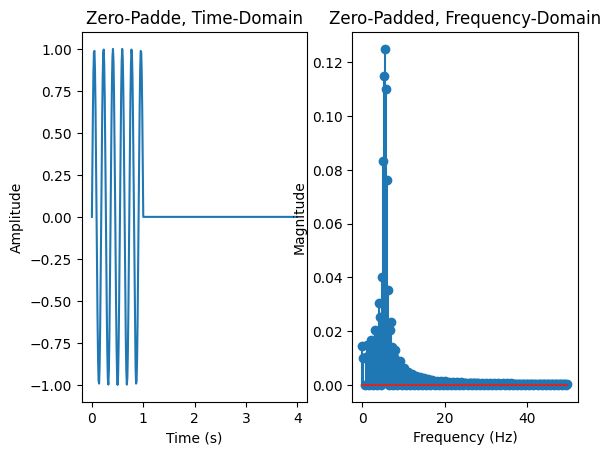

In [ ]:
amp = 1      
freq = 5.5   
duration = 1 
phase = 0    
sr = 100    

# time domain
y = get_sinusoid(amplitude=amp, frequency=freq, duration=duration, sr=sr, phase=phase)

# Zero-pad 
zero_padded_y = np.pad(y, (0, 3 * len(y)), mode='constant')

# FFT of zero-padded 
freq_bins, magnitude_spectrum = get_fft_spectrum(zero_padded_y, sr=sr)

time_vector_padded = np.linspace(0, len(zero_padded_y) / sr, len(zero_padded_y), endpoint=False)

# Time-domain 
plt.subplot(1, 2, 1)
plt.plot(time_vector_padded, zero_padded_y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Zero-Padde, Time-Domain')

# Frequency-domain plot
plt.subplot(1, 2, 2)
plt.stem(freq_bins, magnitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Zero-Padded, Frequency-Domain')

plt.show()


#### Windowing


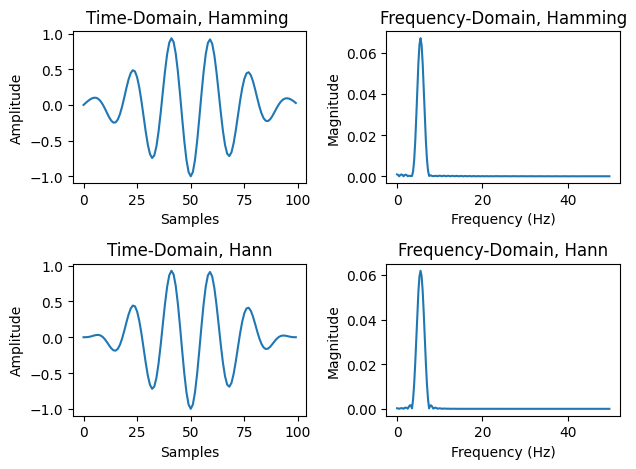

In [ ]:
amp = 1
freq = 5.5
duration = 1
sr = 100
phase = 0
y = get_sinusoid(amplitude=amp, frequency=freq, duration=duration, sr=sr, phase=phase)

# Hamming 
hamming_window = np.hamming(len(y))
hamming_signal = y * hamming_window
hamming_padded = np.pad(hamming_signal, (0, 3 * len(y)), mode='constant')

# Hann 
hann_window = np.hanning(len(y))
hann_signal = y * hann_window
hann_padded = np.pad(hann_signal, (0, 3 * len(y)), mode='constant')

# FFT spectra
freq_bins_hamming, magnitude_spectrum_hamming = get_fft_spectrum(hamming_padded, sr=sr)
freq_bins_hann, magnitude_spectrum_hann = get_fft_spectrum(hann_padded, sr=sr)


# Time-domain, Hamming 
plt.subplot(2, 2, 1)
plt.plot(hamming_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Time-Domain, Hamming ')

# Frequency-domain, Hamming
plt.subplot(2, 2, 2)
plt.plot(freq_bins_hamming, magnitude_spectrum_hamming)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency-Domain, Hamming')

# Time-domain, Hann 
plt.subplot(2, 2, 3)
plt.plot(hann_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Time-Domain, Hann')

# Frequency-domain plot of Hann windowed signal
plt.subplot(2, 2, 4)
plt.plot(freq_bins_hann, magnitude_spectrum_hann)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency-Domain, Hann')

plt.tight_layout()
plt.show()



--- 
### Applying the FFT to real audio 

In [ ]:
# Load the trumpet sample and truncate to 4k samples
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename, sr=None)
y_truncated = y[:4000]

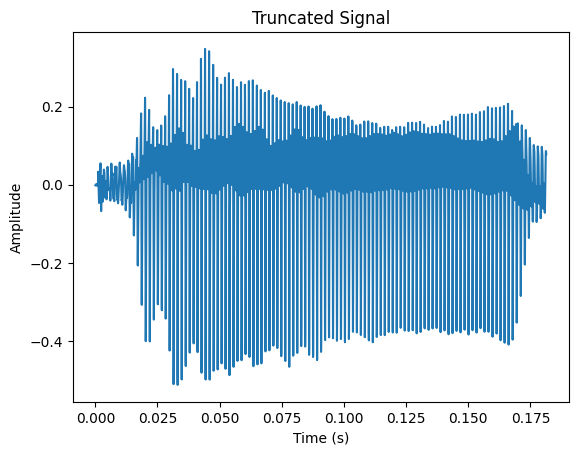

In [ ]:
import IPython.display as ipd

ipd.display(ipd.Audio(y_truncated, rate=sr))

time_vector = np.linspace(0, len(y_truncated) / sr, len(y_truncated), endpoint=False)
plt.plot(time_vector, y_truncated)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Truncated Signal')
plt.show()

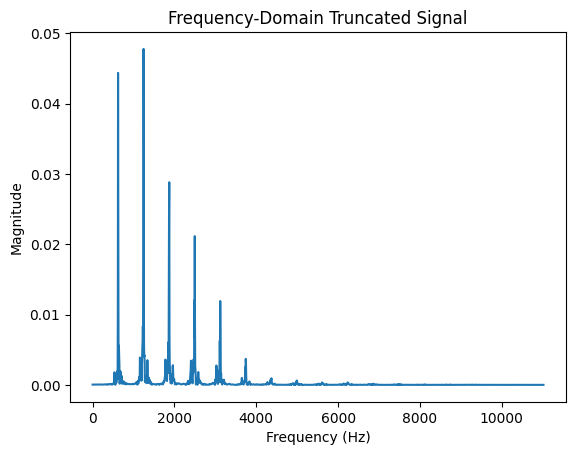

In [ ]:
# FFT function on the trumpet sample above.
freq_bins, magnitude_spectrum = get_fft_spectrum(y_truncated, sr)

plt.plot(freq_bins, magnitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency-Domain Truncated Signal')
plt.show()

***We can see a prominent peak near 440 Hz (A4, which is a common reference note for tuning musical instruments). So it confirms that the spectrum corresponds to the fundamental frequency of the note.***




---

## FFT -> Short Time Fourier Transform (STFT) & Spectrograms 

In [ ]:
from scipy.signal.windows import get_window

def simple_stft(x, frame_len, hop_len, window_type='boxcar'):
    """
    Computes the Short-Time Fourier Transform (STFT) of a 1D signal.

    Parameters:
    -----------
        x : numpy.ndarray
            Input signal, a 1D array.
        frame_len :  int
            Length of each frame (window size).
        hop_len : int
            Hop length between consecutive frames.
        window_type : str
            Type of window e.g. "hann", "boxcar".

    Returns:
    --------
    stft_result : numpy.ndarray
        A 2D array (n_freqs, n_frames) where each row corresponds to the real,
        non-negative frequency components of a frame.

    """
    # Zero-pad
    x_padded = np.pad(x, pad_width=(frame_len // 2, frame_len // 2), mode='constant')

    # window function 'boxcar'
    window = get_window(window_type, frame_len)

    # STFT results with frame extraction
    num_frames = 1 + (len(x_padded) - frame_len) // hop_len
    stft = np.zeros((frame_len // 2 + 1, num_frames), dtype=complex)

    for i in range(num_frames):
        start = i * hop_len
        frame = x_padded[start:start + frame_len] * window
        stft[:, i] = np.fft.rfft(frame)
        
    return stft

In [ ]:
# Run these checks on dummy signals to make sure STFT has the right number of frames.
sig = np.random.rand((200))
test1 = simple_stft(sig, frame_len=80, hop_len=30, window_type='boxcar')
print(test1.shape)
assert test1.shape == (41,7)

(41, 7)


In [ ]:
# sanity check 2 
sig2 = np.random.rand((200))
test2 = simple_stft(sig2, frame_len=80, hop_len=80, window_type='boxcar')
print(test2.shape)
assert test2.shape == (41,3)

(41, 3)


In [ ]:
# sanity check 3 
sig3 = np.random.rand((200))
test3 = simple_stft(sig3, frame_len=80, hop_len=100, window_type='boxcar')
print(test3.shape)
assert test3.shape == (41,3)

(41, 3)


In [ ]:
sig4 = np.random.rand(32000)
test4 = simple_stft(sig4, frame_len=1024, hop_len=512, window_type='boxcar')
print(test4.shape)
assert test4.shape[1] == 63


(513, 63)


### STFT -> Spectrograms


In [ ]:
# load the trumpet audio, and truncate it to be only 3 seconds long.
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename, sr=None)
y_truncated = y[:3 * sr]

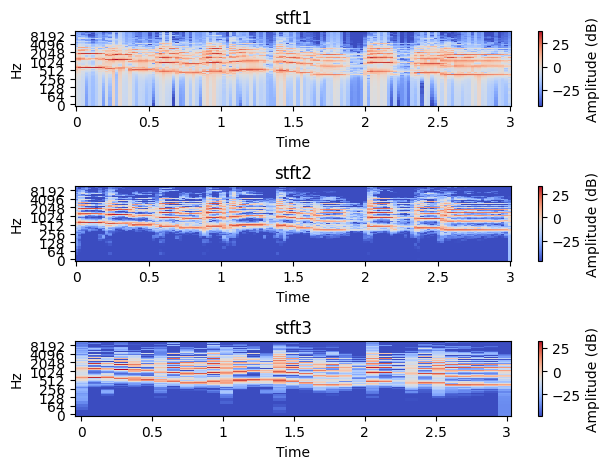

In [ ]:
stft1 = simple_stft(y_truncated, frame_len=1024, hop_len=512, window_type='boxcar')
stft2 = simple_stft(y_truncated, frame_len=1024, hop_len=512, window_type='hann')
stft3 = simple_stft(y_truncated, frame_len=1024, hop_len=2056, window_type='hann')

# Plot a spectrogram from each of these STFTs 

stft1_spect = librosa.amplitude_to_db(np.abs(stft1))
stft2_spect = librosa.amplitude_to_db(np.abs(stft2))
stft3_spect = librosa.amplitude_to_db(np.abs(stft3))


# STFT1 
plt.subplot(3, 1, 1)
librosa.display.specshow(stft1_spect, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(label='Amplitude (dB)')
plt.title('stft1')

# STFT2 
plt.subplot(3, 1, 2)
librosa.display.specshow(stft2_spect, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(label='Amplitude (dB)')
plt.title('stft2')

# STFT3 
plt.subplot(3, 1, 3)
librosa.display.specshow(stft3_spect, sr=sr, hop_length=2056, x_axis='time', y_axis='log')
plt.colorbar(label='Amplitude (dB)')
plt.title('stft3')

plt.tight_layout()
plt.show()

- STFT1:
The boxcar window causes spectral leakage, which leads to blurry frequency components and some artifacts. The time resolution is good because the hop length is moderate, but the frequency resolution isn’t as good.

- STFT2:
The Hann window does a better job at reducing spectral leakage, and the harmonic structures look cleaner compared to STFT1. With the same hop length, it maintains good frequency detail.

- STFT3:
Larger hop length decreases the time resolution, but improves frequency resolution. This makes the harmonic bands clearer than in STFT2.

- Trade-offs:

***Small hop length:*** Gives better time resolution but decreases frequency resolution. We get more frequent frames that can capture quick changes in the signal, but they don’t spend as much time capturing the frequency content in each frame.

***Large hop length:*** Improves frequency resolution but decreases time resolution. Since the frames are spaced more, they capture more frequency detail, but fewer overlapping frames can miss rapid changes in the signal.

---

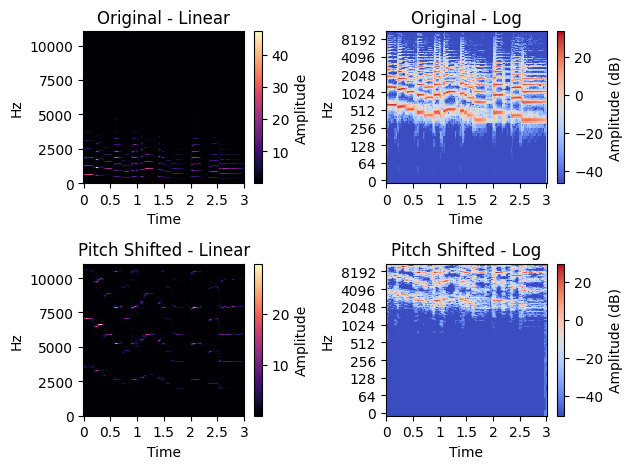

In [13]:
# trumpet audio truncated to 3 seconds
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename, sr=None)
y_truncated = y[:3 * sr]  

# STFT original 
stft_org_linear = simple_stft(y_truncated, frame_len=1024, hop_len=512, window_type='hann')
stft_org_log = librosa.amplitude_to_db(np.abs(stft_org_linear))

# Pitch shift 
y_pitch_shifted = librosa.effects.pitch_shift(y_truncated, sr=sr, n_steps=30)

# STFT pitch-shifted 
stft_pitch_shifted_linear = simple_stft(y_pitch_shifted, frame_len=1024, hop_len=512, window_type='hann')
stft_pitch_shifted_log = librosa.amplitude_to_db(np.abs(stft_pitch_shifted_linear))


# Original - Linear 
plt.subplot(2, 2, 1)
librosa.display.specshow(np.abs(stft_org_linear), sr=sr, hop_length=512, x_axis='time', y_axis='linear')
plt.colorbar(label='Amplitude')
plt.title('Original - Linear')

# Original - Log 
plt.subplot(2, 2, 2)
librosa.display.specshow(stft_org_log, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(label='Amplitude (dB)')
plt.title('Original - Log')

# Pitch shifted - Linear 
plt.subplot(2, 2, 3)
librosa.display.specshow(np.abs(stft_pitch_shifted_linear), sr=sr, hop_length=512, x_axis='time', y_axis='linear')
plt.colorbar(label='Amplitude')
plt.title('Pitch Shifted - Linear')

# Pitch shifted - Log
plt.subplot(2, 2, 4)
librosa.display.specshow(stft_pitch_shifted_log, sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar(label='Amplitude (dB)')
plt.title('Pitch Shifted - Log')

plt.tight_layout()
plt.show()


- The log scale focuses more on the lower frequency range, which makes it easier to view the fundamental frequency and its lower harmonics where most of the signal’s energy is concentrated. 

- The linear scale is where the harmonics are equally spaced, so it's better for seeing how the harmonics are spread across the entire frequency range, especially at higher frequencies. 

- In this case, we can see that after the pitch shift the harmonic bands move upward consistently in both spectrograms. This can be seen more clearly in Log space compared to Linear.